# Loading impotant libraries

In [1]:
import os  # For path loading
import cv2  # For working with images
import numpy as np  # Array related work
import matplotlib.pyplot as plt  # For ploting images
from sklearn.model_selection import train_test_split  # Deviding data in training, testing and validation
import tensorflow as tf
from tensorflow.keras import layers, models # For neural network
import random  # To assume numbers
#from tensorflow.keras.models import load_model # For saving model

Summary of Expressions
0. Angry
1. Disgust
2. Fear
3. Happy
4. Sad
5. Surprise
6. Neutral



In [2]:
A_e = '/content/drive/MyDrive/Colab Notebooks/Models/Facial expression recognition/0'
Angry = os.listdir(A_e)

D_e = '/content/drive/MyDrive/Colab Notebooks/Models/Facial expression recognition/1'
Disgust = os.listdir(D_e)

F_e = '/content/drive/MyDrive/Colab Notebooks/Models/Facial expression recognition/2'
Fear = os.listdir(F_e)

H_e = '/content/drive/MyDrive/Colab Notebooks/Models/Facial expression recognition/3'
Happy = os.listdir(H_e)

S_e = '/content/drive/MyDrive/Colab Notebooks/Models/Facial expression recognition/4'
Sad = os.listdir(S_e)

Sp_e = '/content/drive/MyDrive/Colab Notebooks/Models/Facial expression recognition/5'
Surprise = os.listdir(Sp_e)

N_e = '/content/drive/MyDrive/Colab Notebooks/Models/Facial expression recognition/6'
Neutral = os.listdir(N_e)

In [3]:
X = []
y = []

In [4]:
for img in Angry:
    img_path = os.path.join(A_e, img)
    X.append(cv2.imread(img_path))
    y.append(0)

for img in Disgust:
    img_path = os.path.join(D_e, img)
    X.append(cv2.imread(img_path))
    y.append(1)

for img in Fear:
    img_path = os.path.join(F_e, img)
    X.append(cv2.imread(img_path))
    y.append(2)

for img in Happy:
    img_path = os.path.join(H_e, img)
    X.append(cv2.imread(img_path))
    y.append(3)

for img in Sad:
    img_path = os.path.join(S_e, img)
    X.append(cv2.imread(img_path))
    y.append(4)

for img in Surprise:
    img_path = os.path.join(Sp_e, img)
    X.append(cv2.imread(img_path))
    y.append(5)

for img in Neutral:
    img_path = os.path.join(N_e, img)
    X.append(cv2.imread(img_path))
    y.append(6)

In [5]:
# Converting pixel values 0 to 1 from 0 to 255
# Converting list into numpy array
X = np.array(X) / 255.0
y = np.array(y)

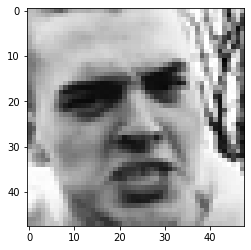

(48, 48, 3)


In [6]:
# Let's look at any random image
img = X[1000]
plt.figure()
plt.imshow(img, cmap=plt.cm.binary)
plt.grid(False)
plt.show()
print(img.shape)

# Let's convert our dataset into training, testing and validation

In [7]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.2)

# Creating Convolutional Neural Network (CNN)

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

In [9]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(7))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 128)         7

# Compile and train the model

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_X, train_y, epochs=10, 
                    validation_data=(test_X, test_y))

Epoch 1/10
718/718 [==============================] - 13s 7ms/step - loss: 1.8119 - accuracy: 0.2446 - val_loss: 1.6172 - val_accuracy: 0.3701
Epoch 2/10
718/718 [==============================] - 4s 6ms/step - loss: 1.5338 - accuracy: 0.3983 - val_loss: 1.5053 - val_accuracy: 0.4157
Epoch 3/10
718/718 [==============================] - 4s 6ms/step - loss: 1.3651 - accuracy: 0.4726 - val_loss: 1.3926 - val_accuracy: 0.4607
Epoch 4/10
718/718 [==============================] - 4s 6ms/step - loss: 1.2718 - accuracy: 0.5047 - val_loss: 1.2922 - val_accuracy: 0.5071
Epoch 5/10
718/718 [==============================] - 4s 6ms/step - loss: 1.1781 - accuracy: 0.5475 - val_loss: 1.2645 - val_accuracy: 0.5202
Epoch 6/10
718/718 [==============================] - 4s 6ms/step - loss: 1.1077 - accuracy: 0.5786 - val_loss: 1.2347 - val_accuracy: 0.5343
Epoch 7/10
718/718 [==============================] - 4s 6ms/step - loss: 1.0522 - accuracy: 0.5995 - val_loss: 1.2612 - val_accuracy: 0.5359
Epoch

# Evaluate the model

225/225 - 1s - loss: 1.2935 - accuracy: 0.5461
Accuracy =  54.61 %


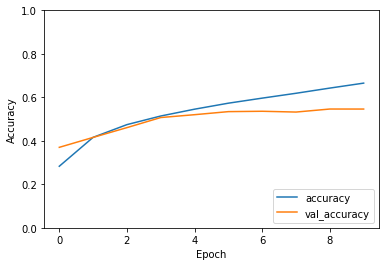

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_X,  test_y, verbose=2)
print("Accuracy = ", '%0.2f' % (test_acc*100), "%")

# Predicting Result

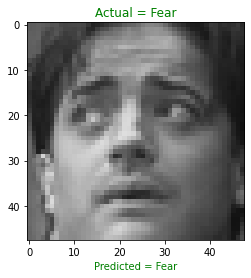

In [15]:
COLOR = 'green'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
    class_names = [str(i) for i in range(7)]
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]

    show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    expr = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
    plt.title(f'Actual = {expr[int(label)]}')
    plt.xlabel(f'Predicted = {expr[int(guess)]}')
    plt.grid(False)
    plt.show()

t = random.randint(0, len(val_X))
image = val_X[t]
label = val_y[t]
predict(model, image, label)

# Saving Model

In [14]:
model.save("Facial_Expression_Recognition.h5")